<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Fresnel-based DOE Stokes analyzer </font>
</div>
<div align="center"> 
<font size=4> Permutaciones </font>
</div>

- **Fecha**: 2022/03/15
        
- **Autores**: 
    - Javier Alda
    - Luis Miguel Sánchez Brea

   
- **Estado**: En desarrollo

- **Objetivos**: 
    - Tenemos una lente de Fresnel sectorizada con estados de polarizacion.
    - Vamos a permutar los estados de polarizacion para ver si cambian los errores
    - Se guardan las imágenes de los errores en la esfera de poincaré
    - Se guardan los valores máximos y mínimos.
    - De momento lo hacemos para la lente ideal, pero luego habrá que meterlo en la lente SLM.
   

- **Referencias**: Based on diffractio py module

- **Conclusiones**: 
    - 



# Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import diffractio
import matplotlib as mpl

from diffractio import degrees, mm, plt, sp, um, np, nm
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY

from diffractio.utils_drawing import draw_several_fields

In [3]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from py_pol.stokes import Stokes

In [4]:
from py_aocg.stokes_analyzer.stokes_analyzer import (Stokes_analyzer, compute_intensity, compute_stokes,compute_stokes_several,
                                                     states_standard, Detector, fill_sphere_fibonacci, standard_Wi)

In [5]:
import plotly.graph_objects as go

In [6]:
from sympy.utilities.iterables import multiset_permutations
from itertools import permutations


In [7]:
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.pad_inches']=0.0
mpl.rcParams['figure.subplot.hspace']=0
mpl.rcParams['figure.subplot.wspace']=0
mpl.rcParams['figure.subplot.left']=0.075

In [8]:
np.printoptions(precision=2);
import warnings
warnings.filterwarnings('ignore') 

### Generation of the Polarization State Analyzer with N fresnel zones

In [9]:
num_sectors = 6
angulosector = 360/num_sectors
focal = 150 * mm
r_shift = 1.5*mm
has_draw = True
detector_radius = 200*um

In [21]:
num_pixels = 256

length = 5*mm
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um


In [22]:
u0 = Scalar_source_XY(x0,y0,wavelength)
u0.gauss_beam(r0=(0,0), w0=2*mm,z0=0)


In [23]:

mpl.rcParams['figure.figsize']=(5,4)

i_stokes_analyzer = Stokes_analyzer(x0, y0, wavelength)
i_stokes_analyzer.stokes_analyzer_lens_indexes(focal, r_shift, num_sectors=6)
i_stokes_analyzer.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); 
plt.clim(vmin=0)
plt.savefig('Figure1.pdf')

# Detectores

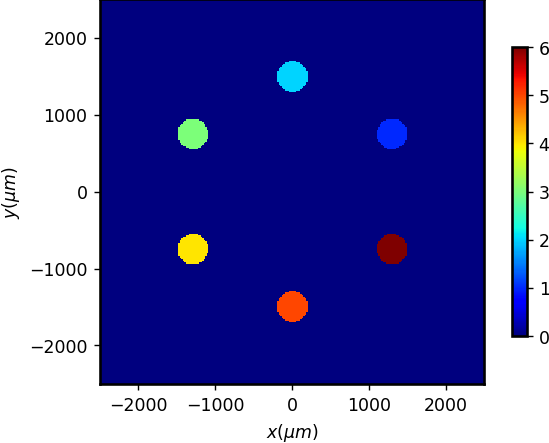

In [24]:
detector = Detector(x0, y0, wavelength)
detector.circular(focal, r_shift,    detector_radius= detector_radius,   num_sectors=num_sectors,  has_draw=True)
detector.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)

# Generación de máscara vectorial

In [25]:
x,y,z, Jones_regular=fill_sphere_fibonacci(num_samples=20, kind_exit='Jones')

In [26]:
Jones_regular[0]

E_picked = 
[+0.707+0.000j ]   
[+0.707+0.000j ]   

## Asignación de estados de polarización a cada uno de los índices

In [27]:
estados_permutables = (3,4,5,6,7)

In [28]:
States = states_standard()
States_permutable=States[3:]
for i in States_permutable:
    print(i,"\n")

[[5.000000e-01+0.j  3.061617e-17-0.5j]
 [3.061617e-17+0.5j 5.000000e-01+0.j ]] 

[[3.74939946e-33+0.j 6.12323400e-17+0.j]
 [6.12323400e-17+0.j 1.00000000e+00+0.j]] 

[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]] 

[[ 5.00000000e-01+0.j  -9.18485099e-17+0.5j]
 [-9.18485099e-17-0.5j  5.00000000e-01+0.j ]] 

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]] 



In [29]:
perms = set(permutations(estados_permutables))
perms

{(3, 4, 5, 6, 7),
 (3, 4, 5, 7, 6),
 (3, 4, 6, 5, 7),
 (3, 4, 6, 7, 5),
 (3, 4, 7, 5, 6),
 (3, 4, 7, 6, 5),
 (3, 5, 4, 6, 7),
 (3, 5, 4, 7, 6),
 (3, 5, 6, 4, 7),
 (3, 5, 6, 7, 4),
 (3, 5, 7, 4, 6),
 (3, 5, 7, 6, 4),
 (3, 6, 4, 5, 7),
 (3, 6, 4, 7, 5),
 (3, 6, 5, 4, 7),
 (3, 6, 5, 7, 4),
 (3, 6, 7, 4, 5),
 (3, 6, 7, 5, 4),
 (3, 7, 4, 5, 6),
 (3, 7, 4, 6, 5),
 (3, 7, 5, 4, 6),
 (3, 7, 5, 6, 4),
 (3, 7, 6, 4, 5),
 (3, 7, 6, 5, 4),
 (4, 3, 5, 6, 7),
 (4, 3, 5, 7, 6),
 (4, 3, 6, 5, 7),
 (4, 3, 6, 7, 5),
 (4, 3, 7, 5, 6),
 (4, 3, 7, 6, 5),
 (4, 5, 3, 6, 7),
 (4, 5, 3, 7, 6),
 (4, 5, 6, 3, 7),
 (4, 5, 6, 7, 3),
 (4, 5, 7, 3, 6),
 (4, 5, 7, 6, 3),
 (4, 6, 3, 5, 7),
 (4, 6, 3, 7, 5),
 (4, 6, 5, 3, 7),
 (4, 6, 5, 7, 3),
 (4, 6, 7, 3, 5),
 (4, 6, 7, 5, 3),
 (4, 7, 3, 5, 6),
 (4, 7, 3, 6, 5),
 (4, 7, 5, 3, 6),
 (4, 7, 5, 6, 3),
 (4, 7, 6, 3, 5),
 (4, 7, 6, 5, 3),
 (5, 3, 4, 6, 7),
 (5, 3, 4, 7, 6),
 (5, 3, 6, 4, 7),
 (5, 3, 6, 7, 4),
 (5, 3, 7, 4, 6),
 (5, 3, 7, 6, 4),
 (5, 4, 3, 6, 7),
 (5, 4, 3,

In [34]:
mask_vector_0 = Vector_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask_vector_0.multilevel_mask(mask=i_stokes_analyzer, states=States, discretize=False, normalize=False)


Jz_out, Signals, Stokes_results, Jones_results, Errors = compute_stokes_several(
                               Jones_regular,
                               mask_vector_0,
                               detector,
                               focal,
                               r_shift,
                               num_sectors,
                               Wi=standard_Wi,
                               has_draw=False,
                               has_background=False)

In [38]:
errores_min = np.zeros(len(perms))
errores_max = np.zeros(len(perms))
Wi=np.zeros_like(standard_Wi)

for i, perm in enumerate(perms):
    #print(perm)
    estado_actual = (States[0], States[1], States[2], States[perm[0]], States[perm[1]],  States[perm[2]], States[perm[3]], States[4])

    Wi[:,0]=standard_Wi[:,0]
    Wi[:,1]=standard_Wi[:,perm[0]-2]
    Wi[:,2]=standard_Wi[:,perm[1]-2]
    Wi[:,3]=standard_Wi[:,perm[2]-2]
    Wi[:,4]=standard_Wi[:,perm[3]-2]
    Wi[:,5]=standard_Wi[:,perm[4]-2]

        
    print(Wi)
    
    mask_vector_0 = Vector_mask_XY(x=x0, y=y0, wavelength=wavelength)
    mask_vector_0.multilevel_mask(mask=i_stokes_analyzer, states=estado_actual, discretize=False, normalize=False)


    Jz_out, Signals, Stokes_results, Jones_results, Errors = compute_stokes_several(
                               Jones_regular,
                               mask_vector_0,
                               detector,
                               focal,
                               r_shift,
                               num_sectors,
                               Wi,
                               has_draw=False,
                               has_background=False)

    errores_min[i]=Errors.min()
    errores_max[i]=Errors.max()

[[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
 [ 1.         -1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          1.        ]
 [ 0.          0.          1.         -1.          0.          0.        ]]
[[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
 [ 1.         -1.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.         -1.          0.        ]
 [ 0.          0.          0.          1.          0.         -1.        ]]
[[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
 [ 1.         -1.          0.          0.          0.          0.        ]
 [ 0.          0.          1.         -1.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.          1.        ]]
[[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
 [ 1.          0.     

# Análisis de resultados